In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("../Datasets/house_sales.csv",delimiter="\t")
data

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [4]:
data_without_dummies = pd.get_dummies(data,columns=['PropertyType'])
data_without_dummies

data_without_dummies['NewConstruction'] = pd.get_dummies(data['NewConstruction'],drop_first=True)

data_without_dummies

,DocumentDate,SalePrice,PropertyID,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
1,2014-09-16,280000,1000102,2014-09-01,405100,0.930836,300805.0,2,9373,2400,...,1991,0,0,70000,229000,98002,0,1,0,0
2,2006-06-16,1000000,1200013,2006-06-01,404400,0.929228,1076162.0,1,20156,3764,...,2005,0,0,203000,590000,98166,1,0,1,0
3,2007-01-29,745000,1200019,2007-01-01,425600,0.977941,761805.0,1,26036,2060,...,1947,0,0,183000,275000,98166,0,0,1,0
4,2008-02-25,425000,2800016,2008-02-01,418400,0.961397,442065.0,1,8618,3200,...,1966,0,0,104000,229000,98168,0,0,1,0
5,2013-03-29,240000,2800024,2013-03-01,351600,0.807904,297065.0,1,8620,1720,...,1948,0,0,104000,205000,98168,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,2011-04-01,318700,0.732307,443803.0,1,5468,1480,...,1951,0,0,201000,172000,98126,0,0,1,0
27058,2007-09-28,1580000,9845500010,2007-09-01,433500,0.996094,1586196.0,1,23914,4720,...,2000,0,1,703000,951000,98040,0,0,1,0
27061,2012-07-09,165000,9899200010,2012-07-01,325300,0.747472,220744.0,1,11170,1070,...,1971,0,0,92000,130000,98055,0,0,1,0
27062,2006-05-26,315000,9900000355,2006-05-01,400600,0.920496,342207.0,1,6223,1345,...,1939,0,0,103000,212000,98166,0,0,1,0


In [5]:
cleaned_data = data_without_dummies.drop(['DocumentDate','ym','AdjSalePrice','PropertyID','ZipCode'],axis=1)
cleaned_data

,SalePrice,zhvi_px,zhvi_idx,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
1,280000,405100,0.930836,2,9373,2400,0,3.00,6,7,1991,0,0,70000,229000,0,1,0,0
2,1000000,404400,0.929228,1,20156,3764,1452,3.75,4,10,2005,0,0,203000,590000,1,0,1,0
3,745000,425600,0.977941,1,26036,2060,900,1.75,4,8,1947,0,0,183000,275000,0,0,1,0
4,425000,418400,0.961397,1,8618,3200,1640,3.75,5,7,1966,0,0,104000,229000,0,0,1,0
5,240000,351600,0.807904,1,8620,1720,0,1.75,4,7,1948,0,0,104000,205000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,325000,318700,0.732307,1,5468,1480,590,1.75,3,7,1951,0,0,201000,172000,0,0,1,0
27058,1580000,433500,0.996094,1,23914,4720,910,4.50,4,11,2000,0,1,703000,951000,0,0,1,0
27061,165000,325300,0.747472,1,11170,1070,0,1.00,4,6,1971,0,0,92000,130000,0,0,1,0
27062,315000,400600,0.920496,1,6223,1345,0,2.00,3,7,1939,0,0,103000,212000,0,0,1,0


In [6]:
model = LinearRegression()

model.fit(cleaned_data,data['AdjSalePrice'])

model.coef_

array([ 1.07241884e+00, -1.45006882e+00, -3.32291522e-06,  2.79560961e+03,
        1.68564694e-02,  2.08869185e+00, -7.79341291e-01, -5.41986826e+02,
       -4.03869018e+02,  5.62459949e+02, -3.39883262e+01, -1.77676086e-02,
        1.07769949e+02,  4.08222421e-02,  3.16066201e-02, -1.47359839e+03,
       -1.68285141e+03, -3.38972678e+02,  2.02182409e+03])

In [7]:
# Factor variables con muchos niveles

# Zip code y building grade (bldggrade)

In [8]:
data['ZipCode'].value_counts()

98038    788
98103    671
98042    641
98115    620
98117    619
        ... 
98288      4
98224      3
98068      1
98113      1
98043      1
Name: ZipCode, Length: 80, dtype: int64

In [9]:
zipcode_df = pd.DataFrame({
    'ZipCode': data['ZipCode'],
    'puntajeZipCode': data['AdjSalePrice'] - model.predict(cleaned_data)
})
zipcode_df

,ZipCode,puntajeZipCode
1,98002,7467.163327
2,98166,-7758.394335
3,98166,-7508.757846
4,98168,11348.927433
5,98168,-31646.147612
...,...,...
27057,98126,-25975.427128
27058,98040,-113741.248016
27061,98055,-60559.814174
27062,98166,4186.784643


In [10]:
grouped = pd.DataFrame([{
    'ZipCode':row[0],
    'Count':len(row[1]),
    'Residual_avg': np.percentile(np.array(row[1]),50)
} for row in zipcode_df.groupby(['ZipCode'])]).sort_values('Residual_avg')

grouped

,ZipCode,Count,Residual_avg
77,98224,3,23077.301518
55,98113,1,39398.712620
36,98057,4,49591.922685
40,98068,1,54926.098656
27,98043,1,57229.578757
...,...,...,...
66,98144,332,98144.000000
67,98146,287,98146.000000
69,98155,358,98155.000000
72,98177,216,98177.000000


In [11]:
np.cumsum(grouped['Count'])

77        3
55        4
36        8
40        9
27       10
      ...  
66    21433
67    21720
69    22078
72    22294
76    22687
Name: Count, Length: 80, dtype: int64

In [12]:
# Agregar el valor de los grupos al cleaned_data
grouped['ZipGroup'] = pd.qcut(np.cumsum(grouped['Count']),5,labels=False,retbins=False)

In [13]:
grouped

,ZipCode,Count,Residual_avg,ZipGroup
77,98224,3,23077.301518,0
55,98113,1,39398.712620,0
36,98057,4,49591.922685,0
40,98068,1,54926.098656,0
27,98043,1,57229.578757,0
...,...,...,...,...
66,98144,332,98144.000000,4
67,98146,287,98146.000000,4
69,98155,358,98155.000000,4
72,98177,216,98177.000000,4


In [14]:
join = grouped[['ZipCode','ZipGroup']].set_index('ZipCode')

In [15]:
join

,ZipGroup
ZipCode,
98224,0
98113,0
98057,0
98068,0
98043,0
...,...
98144,4
98146,4
98155,4


In [16]:
cleaned_data['ZipCode'] = data['ZipCode']

cleaned_data = cleaned_data.join(join,on='ZipCode')

cleaned_data

,SalePrice,zhvi_px,zhvi_idx,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,...,YrRenovated,TrafficNoise,LandVal,ImpsVal,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse,ZipCode,ZipGroup
1,280000,405100,0.930836,2,9373,2400,0,3.00,6,7,...,0,0,70000,229000,0,1,0,0,98002,1
2,1000000,404400,0.929228,1,20156,3764,1452,3.75,4,10,...,0,0,203000,590000,1,0,1,0,98166,1
3,745000,425600,0.977941,1,26036,2060,900,1.75,4,8,...,0,0,183000,275000,0,0,1,0,98166,1
4,425000,418400,0.961397,1,8618,3200,1640,3.75,5,7,...,0,0,104000,229000,0,0,1,0,98168,1
5,240000,351600,0.807904,1,8620,1720,0,1.75,4,7,...,0,0,104000,205000,0,0,1,0,98168,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,325000,318700,0.732307,1,5468,1480,590,1.75,3,7,...,0,0,201000,172000,0,0,1,0,98126,2
27058,1580000,433500,0.996094,1,23914,4720,910,4.50,4,11,...,0,1,703000,951000,0,0,1,0,98040,3
27061,165000,325300,0.747472,1,11170,1070,0,1.00,4,6,...,0,0,92000,130000,0,0,1,0,98055,1
27062,315000,400600,0.920496,1,6223,1345,0,2.00,3,7,...,0,0,103000,212000,0,0,1,0,98166,1


In [17]:
cleaned_data['ZipGroup'] = cleaned_data['ZipGroup'].astype('category')

cleaned_data.dtypes

SalePrice                        int64
zhvi_px                          int64
zhvi_idx                       float64
NbrLivingUnits                   int64
SqFtLot                          int64
SqFtTotLiving                    int64
SqFtFinBasement                  int64
Bathrooms                      float64
Bedrooms                         int64
BldgGrade                        int64
YrBuilt                          int64
YrRenovated                      int64
TrafficNoise                     int64
LandVal                          int64
ImpsVal                          int64
NewConstruction                  uint8
PropertyType_Multiplex           uint8
PropertyType_Single Family       uint8
PropertyType_Townhouse           uint8
ZipCode                          int64
ZipGroup                      category
dtype: object

In [18]:
cleaned_data.drop(['ZipCode'], axis=1,inplace=True)

In [19]:
cleaned_data

,SalePrice,zhvi_px,zhvi_idx,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse,ZipGroup
1,280000,405100,0.930836,2,9373,2400,0,3.00,6,7,1991,0,0,70000,229000,0,1,0,0,1
2,1000000,404400,0.929228,1,20156,3764,1452,3.75,4,10,2005,0,0,203000,590000,1,0,1,0,1
3,745000,425600,0.977941,1,26036,2060,900,1.75,4,8,1947,0,0,183000,275000,0,0,1,0,1
4,425000,418400,0.961397,1,8618,3200,1640,3.75,5,7,1966,0,0,104000,229000,0,0,1,0,1
5,240000,351600,0.807904,1,8620,1720,0,1.75,4,7,1948,0,0,104000,205000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,325000,318700,0.732307,1,5468,1480,590,1.75,3,7,1951,0,0,201000,172000,0,0,1,0,2
27058,1580000,433500,0.996094,1,23914,4720,910,4.50,4,11,2000,0,1,703000,951000,0,0,1,0,3
27061,165000,325300,0.747472,1,11170,1070,0,1.00,4,6,1971,0,0,92000,130000,0,0,1,0,1
27062,315000,400600,0.920496,1,6223,1345,0,2.00,3,7,1939,0,0,103000,212000,0,0,1,0,1


In [20]:
model = LinearRegression()
model_cleaned_data = cleaned_data.drop(['SalePrice'],axis=1)
model.fit(model_cleaned_data,data['AdjSalePrice'])

for name,coef in zip(model_cleaned_data.columns,model.coef_):
    print(f'{name}: {coef}')

zhvi_px: -0.1674596603447117
zhvi_idx: -5.489577539208312e-07
NbrLivingUnits: 20973.51800381115
SqFtLot: 0.41933844955362076
SqFtTotLiving: 41.480635058408055
SqFtFinBasement: -9.94470184861002
Bathrooms: 1605.208855167008
Bedrooms: -8242.127779719687
BldgGrade: 8496.073694646082
YrBuilt: -125.66563872036288
YrRenovated: -13.69250574213767
TrafficNoise: -480.89328939949297
LandVal: 1.0583014705894835
ImpsVal: 0.7884254472132797
NewConstruction: 21832.562902306236
PropertyType_Multiplex: -14071.663114277962
PropertyType_Single Family: 2255.010491304594
PropertyType_Townhouse: 11816.652622973337
ZipGroup: -5133.76801345548


In [21]:
model_cleaned_data.corr()

,zhvi_px,zhvi_idx,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
zhvi_px,1.000000,1.000000,0.015234,-0.012913,-0.021532,-0.007176,-0.027775,-0.000161,-0.046050,-0.016218,-0.000791,0.008416,-0.023738,-0.031515,0.038405,0.019766,-0.001987,-0.005806
zhvi_idx,1.000000,1.000000,0.015234,-0.012913,-0.021532,-0.007176,-0.027775,-0.000161,-0.046050,-0.016218,-0.000791,0.008416,-0.023738,-0.031515,0.038405,0.019766,-0.001987,-0.005806
NbrLivingUnits,0.015234,0.015234,1.000000,-0.005113,0.059581,0.066807,0.111242,0.168103,-0.048098,-0.109187,0.011369,0.083206,0.031429,0.003013,-0.036865,0.806063,-0.274530,-0.030503
SqFtLot,-0.012913,-0.012913,-0.005113,1.000000,0.195967,0.035430,0.107439,0.069091,0.145508,0.068400,0.006911,-0.012829,0.071052,0.107673,-0.067419,-0.020170,0.099319,-0.097781
SqFtTotLiving,-0.021532,-0.021532,0.059581,0.195967,1.000000,0.407234,0.764155,0.600317,0.770499,0.311560,0.067191,-0.060686,0.467763,0.761802,0.113734,0.014581,0.176935,-0.194445
SqFtFinBasement,-0.007176,-0.007176,0.066807,0.035430,0.407234,1.000000,0.272772,0.312380,0.137714,-0.210810,0.109495,0.053034,0.283763,0.281993,-0.113499,0.040423,0.082861,-0.104528
Bathrooms,-0.027775,-0.027775,0.111242,0.107439,0.764155,0.272772,1.000000,0.537998,0.658738,0.468610,0.066480,-0.059994,0.309291,0.625223,0.197005,0.057019,-0.066454,0.047977
Bedrooms,-0.000161,-0.000161,0.168103,0.069091,0.600317,0.312380,0.537998,1.000000,0.368125,0.148334,0.045970,-0.039135,0.204159,0.349299,0.011105,0.119969,0.175518,-0.235182
BldgGrade,-0.046050,-0.046050,-0.048098,0.145508,0.770499,0.137714,0.658738,0.368125,1.000000,0.434524,0.025361,-0.063295,0.460107,0.749953,0.168542,-0.060691,0.000326,0.023983
YrBuilt,-0.016218,-0.016218,-0.109187,0.068400,0.311560,-0.210810,0.468610,0.148334,0.434524,1.000000,-0.247338,-0.147166,-0.106284,0.182368,0.386531,-0.110211,-0.232476,0.291983


<AxesSubplot:>

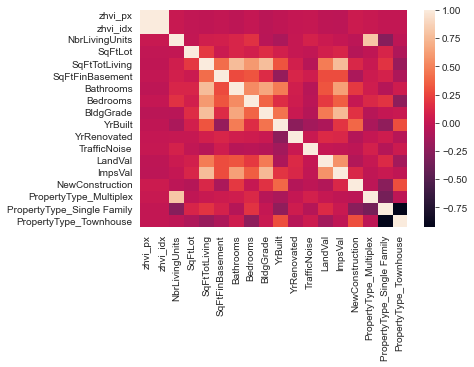

In [22]:
sns.heatmap(model_cleaned_data.corr())

In [23]:
model_cleaned_data.drop(['zhvi_px','PropertyType_Multiplex','PropertyType_Townhouse','PropertyType_Single Family','YrBuilt','ImpsVal','Bathrooms'],axis=1,inplace=True)

In [24]:
model_v2 = LinearRegression()

model_v2.fit(model_cleaned_data,data['AdjSalePrice'])

for name,coef in zip(model_cleaned_data.columns,model_v2.coef_):
    print(f'{name}: {coef}')

zhvi_idx: -73960.65074123876
NbrLivingUnits: 9497.406137097145
SqFtLot: 0.20420496579595238
SqFtTotLiving: 133.05407322080075
SqFtFinBasement: -5.231526739894296
Bedrooms: -26032.85369722891
BldgGrade: 56605.188358118205
YrRenovated: 7.720240214083867
TrafficNoise: 8769.086691413962
LandVal: 1.2466608356080542
NewConstruction: 35398.82926598824
ZipGroup: 8350.709840697213


<AxesSubplot:>

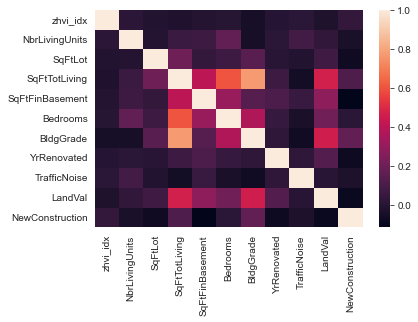

In [25]:
sns.heatmap(model_cleaned_data.corr())

In [26]:
# Analizar la correlación entre las variables

In [31]:
model_cleaned_data['AdjSalePrice'] = data['AdjSalePrice']

model_with_main_effects = smf.ols("AdjSalePrice ~ SqFtTotLiving*ZipGroup + NbrLivingUnits + SqFtLot + BldgGrade + NewConstruction", data=model_cleaned_data)

results = model_with_main_effects.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2494.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        19:07:24   Log-Likelihood:            -3.1392e+05
No. Observations:               22687   AIC:                         6.279e+05
Df Residuals:                   22673   BIC:                         6.280e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4.752e+05   2.36e+04    -20.141      0.000   -5.21e+05   -4.29e+05
ZipGroup[T.1]               -7.492e+04   1.95e+04     -3.848      0.000   -1.13e+05   -3.68e+04
ZipGroup[T.2]               -2.339e+05   1.78e+04    -13.128      0.000   -2.69e+05   -1.99e+05
ZipGroup[T.3]               -2.419e+05   1.79e+04    -13.512      0.000   -2.77e+05   -2.07e+05
ZipGroup[T.4]               -1.913e+05   1.77e+04    -10.836      0.000   -2.26e+05   -1.57e+05
SqFtTotLiving                  35.6817      8.604      4.147      0.000      18.816      52.547
SqFtTotLiving:ZipGroup[T.1]    27.8634     10.128      2.751      0.006       8.012      47.715
SqFtTotLiving:ZipGroup[T.2]   174.1521      9.057     19.229      0.000     156.400     191.904
SqFtTotLiving:ZipGroup[T.3]   156.7290      9.021     17.374      0.000     139.047     174.411
SqFtTotLiving:ZipGroup[T.4]   200.9865      9.208     21.826      0.000     182.937     219.036
NbrLivingUnits               1.827e+04   1.04e+04      1.752      0.080   -2169.850    3.87e+04
SqFtLot                         0.2507      0.059      4.277      0.000       0.136       0.366
BldgGrade                    1.089e+05   2266.872     48.031      0.000    1.04e+05    1.13e+05
NewConstruction             -6.196e+04   5488.893    -11.288      0.000   -7.27e+04   -5.12e+04
==============================================================================
Omnibus:                    31171.417   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27046807.205
Skew:                           7.499   Prob(JB):                         0.00
Kurtosis:                     171.485   Cond. No.                     7.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Probar el modelo ante los factores vistos: Multicolinealidad, Confounding variables, main effects, interactions...